In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Markdown

In [3]:
# Load data
with open('psy_data.csv', 'r', encoding='utf-8') as f:
    # dogs = pd.read_excel(f, sheet_name='Dataset', header=0)
    dogs = pd.read_csv(f, header=0, index_col=0)


# Čo spôsobuje agresivitu u psov, respektíve aké sú znaky agresívnych psov ?
(Sem píšte všetky možné nápady a ich výsledky. Odporúčám písať obyčajné .py scripty a potom ich len importnete (nie from ... import *) v príslušnej code bunke, alebo píšte kód tak, aby neprepisoval premenne inych, rozhodne nie premennu dogs, mozete pouzit funkcie)

## Agresivita v závislosti od plemena

In [4]:
aggressive_columns = ['Aggressive_dogs_samegender', 'Aggressive_people', 'Aggressive_dogs_oppositegender', 'aggressiveness_dominance_score']

means = dogs.groupby('breed_group')[aggressive_columns].mean().reset_index()
means['Aggressive_columns_sum'] = means[aggressive_columns[0]] + means[aggressive_columns[1]] + means[aggressive_columns[2]]
means.sort_values(by='Aggressive_columns_sum', inplace=True)
fig = px.bar(means, y='breed_group', x=aggressive_columns[:-1])

fig.show()

Ako sme mohli predpokladať, tak bojové plemená majú najväčšiu agresivitu, zaujímavé je (aspoň pre mňa), že nemecký ovčiak berie 2. miesto

### Porovnanie znakov psov patriacich do plemien Fighting_breeds vs Larador_Retriever. V akých znakoch sa značne odlišujú ?

## Vply socializácie psa na jeho agresivitu
(predpoklad: menšia socializácia, väčšia agresivita)

In [5]:

soc = dogs[['socialization', 'aggressiveness_dominance_score']]
# soc['aggressivness'] = dogs[aggressive_columns[0]] + dogs[aggressive_columns[1]] + dogs[aggressive_columns[2]]
soc = soc.sort_values(by='socialization').dropna()
soc = soc.rolling(30).mean()
fig = px.line(data_frame=soc, x='socialization', y='aggressiveness_dominance_score')
fig.show()

Celkom zaujímavo socializácia moc nevplýva na agresivitu.

## Váha u psov a ich agresivita
noro sem to mozes vlepit

## Boja sa agresívne psy viac ?

### Strach u ludi

c:\Users\DarkKnight\.pyenv\pyenv-win\versions\3.12.0\Lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

c:\Users\DarkKnight\.pyenv\pyenv-win\versions\3.12.0\Lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



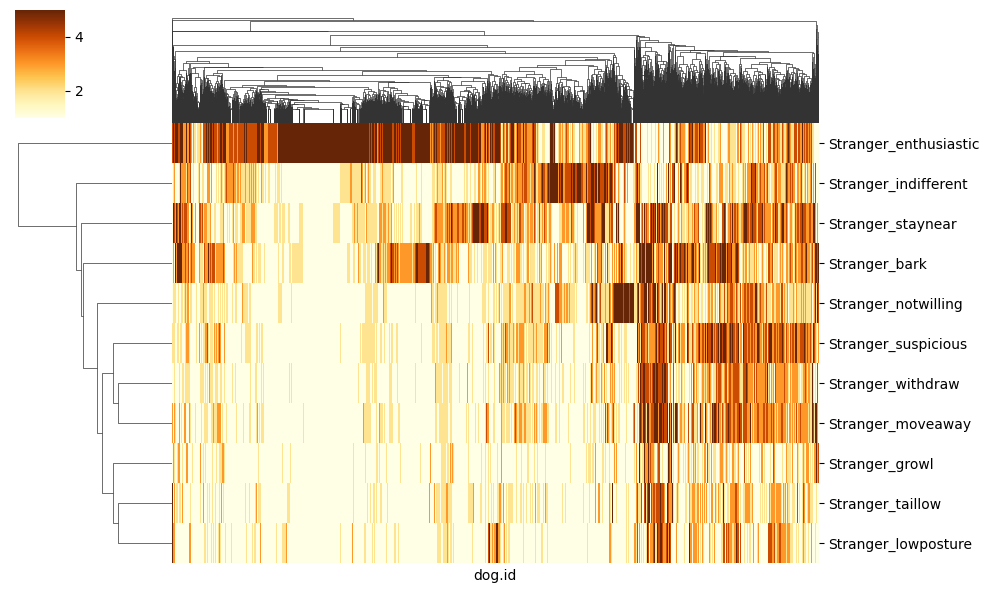

In [6]:
STRANGER_PHOBIAS = ['Stranger_withdraw',
 'Stranger_bark',
 'Stranger_growl',
 'Stranger_taillow',
 'Stranger_staynear',
 'Stranger_notwilling',
 'Stranger_enthusiastic',
 'Stranger_indifferent',
 'Stranger_lowposture',
 'Stranger_moveaway',
 'Stranger_suspicious']

dogs_vs_strangers = dogs[STRANGER_PHOBIAS].dropna().transpose()
sns.clustermap(dogs_vs_strangers, xticklabels=False, cmap='YlOrBr', figsize=(10,6))


1. pes bude pravdepodobne vrcat, ked ma chvost medzi nohami a je skrceny
2. stranger moveaway / withdraw / suspicious su velmi podobne, a asi aj preto to tak ludia v dotaznikoch vyplnili
3. pes steka, ked je notwilling a suspicious
4. pes ak je pes stranger enthusiastic, tak vsetky ostatne su nizke
5. ak pes steka na cudzich, tak aj je pravdepodobne, ze bude moveaway, notwilling, suspicious

## Je väčšia pravdepodobnosť, že pes je agresívnejší, ak nie je od chovateľa ?

**Priemerna agresivita:**

obtained_from
born_home         -0.099612
breeder           -0.009606
rescue_previous    0.206838
Name: aggressiveness_dominance_score, dtype: float64

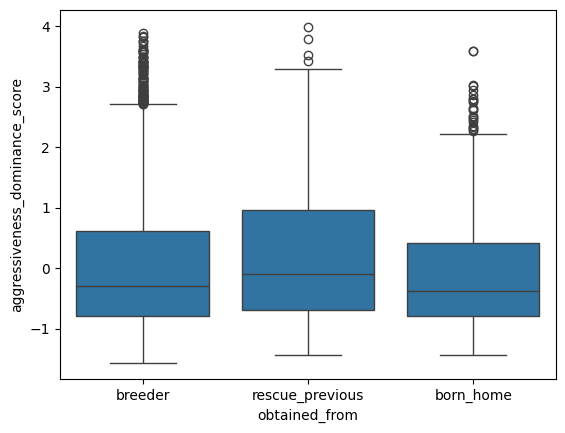

In [7]:
# px.bar(dogs.groupby('obtained_from')['aggressivness_score'])
sns.boxplot(dogs, x='obtained_from', y='aggressiveness_dominance_score')
display(Markdown('**Priemerna agresivita:**'))
display(dogs.groupby('obtained_from')['aggressiveness_dominance_score'].mean())

vyzera, ze zachranene psy su o trosku agresivnejsie.

### Aku maju agresivitu voci ludom

In [8]:
A = dogs.groupby(['obtained_from', 'Aggressive_people'])['Aggressive_people'].count().rename('count').reset_index()
A['count'] = A['count'] / A.groupby('obtained_from')['count'].transform('sum')
B = A.pivot(columns='Aggressive_people', values='count', index='obtained_from')
C = B.transpose()
px.imshow(C).show()